In [95]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/_scripts")

from svg_helpers.saver import Saver, read_layout
from svg_helpers.plotter import Plotter

from svg_helpers.domains import Corners

from svg_reader import SVGReader
from adjacencies.adjacency import AdjacencyGenerator
from adjacencies.connectivity import ConnectivityGenerator

from svg_helpers.shapely import create_box_from_corners, bounds_to_corners

from pint import UnitRegistry

from copy import deepcopy

from shapely import transform

In [36]:
ureg = UnitRegistry()

SCALE = 10 * ureg.feet + 6.75 * ureg.inches
# SCALE = 10 * ureg.feet + 3 * ureg.inches
SCALE
# ref to bedroom_1 Δy 

<Quantity(10.5625, 'foot')>

In [6]:
svg_name = "amber_building_a_f01.svg"
sv = SVGReader(svg_name)
sv.run()

In [100]:
ag = AdjacencyGenerator(sv.domains)
ag.run()

EdgeView([('bedroom_1', 'transit_space'), ('bedroom_1', 'bedroom_2'), ('bedroom_1', 'laundry'), ('kitchen', 'dining'), ('kitchen', 'transit_space'), ('kitchen', 'bedroom_2'), ('m_bath', 'm_bedroom'), ('m_bath', 'bath'), ('m_bath', 'transit_space'), ('m_bath', 'laundry'), ('m_bedroom', 'm_closet'), ('m_bedroom', 'bath'), ('m_bedroom', 'dining'), ('m_closet', 'dining'), ('m_closet', 'closet'), ('bath', 'dining'), ('bath', 'transit_space'), ('bath', 'laundry'), ('dining', 'transit_space'), ('dining', 'closet'), ('transit_space', 'bedroom_2'), ('transit_space', 'laundry')])

In [33]:
corners = sv.domains["bedroom_1"].corners
delta_y = abs(corners.y_bottom - corners.y_top)
delta_y

234.0

In [68]:
CONVERSION = SCALE / (delta_y )
CONVERSION = round(CONVERSION, 3)
CONVERSION.magnitude

0.045

In [66]:
test = (178) * CONVERSION
test.magnitude

8.01

In [17]:
corners

Corners(x_left=0.0, x_right=269.0, y_bottom=275.0, y_top=509.0)

In [2]:
layout = read_layout("leveled_sides")

In [4]:
layout.corners

{'bedroom_1': Corners(x_left=0, x_right=269.0, y_bottom=-234.0, y_top=0),
 'kitchen': Corners(x_left=269.0, x_right=419.0, y_bottom=-497.0, y_top=-295.0),
 'm_bath': Corners(x_left=419.0, x_right=700.0, y_bottom=-109.0, y_top=0),
 'm_bedroom': Corners(x_left=700.0, x_right=878.0, y_bottom=-229.0, y_top=0),
 'm_closet': Corners(x_left=700.0, x_right=878.0, y_bottom=-279.0, y_top=-229.0),
 'bath': Corners(x_left=419.0, x_right=700.0, y_bottom=-212.0, y_top=-109.0),
 'dining': Corners(x_left=419.0, x_right=700.0, y_bottom=-497.0, y_top=-212.0),
 'transit_space': Corners(x_left=269.0, x_right=419.0, y_bottom=-295.0, y_top=-146.0),
 'closet': Corners(x_left=700.0, x_right=878.0, y_bottom=-497.0, y_top=-279.0),
 'bedroom_2': Corners(x_left=0, x_right=269.0, y_bottom=-497.0, y_top=-234.0),
 'laundry': Corners(x_left=269.0, x_right=419.0, y_bottom=-146.0, y_top=0)}

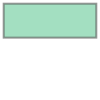

In [87]:
layout.shapes["bath"]

conv = CONVERSION.magnitude
q = transform(layout.shapes["bath"], lambda x: x * [conv, conv])
q

In [90]:
[c for c in q.exterior.coords]

[(31.5, -9.54),
 (31.5, -4.905),
 (18.855, -4.905),
 (18.855, -9.54),
 (31.5, -9.54)]

In [91]:
conv_fx = lambda x: x * [conv, conv]

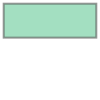

In [92]:
transform(layout.shapes["bath"], conv_fx)

In [93]:
new_shapes = {k: transform(v, conv_fx) for k,v in deepcopy(layout.shapes).items()}
new_shapes

{'bedroom_1': <POLYGON ((12.105 -10.53, 12.105 0, 0 0, 0 -10.53, 12.105 -10.53))>,
 'kitchen': <POLYGON ((18.855 -22.365, 18.855 -13.275, 12.105 -13.275, 12.105 -22.365, 1...>,
 'm_bath': <POLYGON ((31.5 -4.905, 31.5 0, 18.855 0, 18.855 -4.905, 31.5 -4.905))>,
 'm_bedroom': <POLYGON ((39.51 -10.305, 39.51 0, 31.5 0, 31.5 -10.305, 39.51 -10.305))>,
 'm_closet': <POLYGON ((39.51 -12.555, 39.51 -10.305, 31.5 -10.305, 31.5 -12.555, 39.51 -...>,
 'bath': <POLYGON ((31.5 -9.54, 31.5 -4.905, 18.855 -4.905, 18.855 -9.54, 31.5 -9.54))>,
 'dining': <POLYGON ((31.5 -22.365, 31.5 -9.54, 18.855 -9.54, 18.855 -22.365, 31.5 -22....>,
 'transit_space': <POLYGON ((18.855 -13.275, 18.855 -6.57, 12.105 -6.57, 12.105 -13.275, 18.85...>,
 'closet': <POLYGON ((39.51 -22.365, 39.51 -12.555, 31.5 -12.555, 31.5 -22.365, 39.51 -...>,
 'bedroom_2': <POLYGON ((12.105 -22.365, 12.105 -10.53, 0 -10.53, 0 -22.365, 12.105 -22.365))>,
 'laundry': <POLYGON ((18.855 -6.57, 18.855 0, 12.105 0, 12.105 -6.57, 18.855 -6.57)

In [103]:
for e in ag.G.edges:
    u,v = e
    if new_shapes[u].touches(new_shapes[v]):
        pass
    else:
        print(f"{u,v} not touching")

('m_bath', 'transit_space') not touching


In [104]:
from shapely import union_all

In [106]:
union = union_all(list(new_shapes.values()))
for hole in union.interiors:
    print(hole)

In [108]:
union = union_all(list(layout.shapes.values()))
for hole in union.interiors:
    print(hole)

In [97]:
corners_from_shapes = {k:bounds_to_corners(v.bounds) for k,v in new_shapes.items()}

In [98]:
corners_from_shapes

{'bedroom_1': Corners(x_left=0.0, x_right=12.105, y_bottom=-10.53, y_top=0.0),
 'kitchen': Corners(x_left=12.105, x_right=18.855, y_bottom=-22.365, y_top=-13.275),
 'm_bath': Corners(x_left=18.855, x_right=31.5, y_bottom=-4.905, y_top=0.0),
 'm_bedroom': Corners(x_left=31.5, x_right=39.51, y_bottom=-10.305, y_top=0.0),
 'm_closet': Corners(x_left=31.5, x_right=39.51, y_bottom=-12.555, y_top=-10.305),
 'bath': Corners(x_left=18.855, x_right=31.5, y_bottom=-9.54, y_top=-4.905),
 'dining': Corners(x_left=18.855, x_right=31.5, y_bottom=-22.365, y_top=-9.54),
 'transit_space': Corners(x_left=12.105, x_right=18.855, y_bottom=-13.275, y_top=-6.569999999999999),
 'closet': Corners(x_left=31.5, x_right=39.51, y_bottom=-22.365, y_top=-12.555),
 'bedroom_2': Corners(x_left=0.0, x_right=12.105, y_bottom=-22.365, y_top=-10.53),
 'laundry': Corners(x_left=12.105, x_right=18.855, y_bottom=-6.569999999999999, y_top=0.0)}

In [99]:
pl = Plotter(corners_from_shapes)
pl.plot()

In [75]:
def scale_dimensions(corners: Corners, conversion):
    delta_y = abs(corners.y_top - corners.y_bottom)
    delta_x = abs(corners.x_right - corners.x_left)

    scaled_x0 = corners.x_left * conversion
    scaled_y0 = corners.y_top * conversion
    scaled_delta_y = delta_y * conversion
    scaled_delta_x = delta_x * conversion
    new_corners = Corners(scaled_x0, 
                          scaled_x0 + scaled_delta_x,
                          scaled_y0,
                          scaled_y0 - scaled_delta_y)
    
    return new_corners

In [85]:
new_corners = deepcopy(layout.corners)
for k,v in new_corners.items():
    new_corners[k] = scale_dimensions(v, CONVERSION.magnitude)

new_corners

{'bedroom_1': Corners(x_left=0.0, x_right=12.105, y_bottom=0.0, y_top=-10.53),
 'kitchen': Corners(x_left=12.105, x_right=18.855, y_bottom=-13.275, y_top=-22.365000000000002),
 'm_bath': Corners(x_left=18.855, x_right=31.5, y_bottom=0.0, y_top=-4.905),
 'm_bedroom': Corners(x_left=31.5, x_right=39.51, y_bottom=0.0, y_top=-10.305),
 'm_closet': Corners(x_left=31.5, x_right=39.51, y_bottom=-10.305, y_top=-12.555),
 'bath': Corners(x_left=18.855, x_right=31.5, y_bottom=-4.905, y_top=-9.54),
 'dining': Corners(x_left=18.855, x_right=31.5, y_bottom=-9.54, y_top=-22.365),
 'transit_space': Corners(x_left=12.105, x_right=18.855, y_bottom=-6.569999999999999, y_top=-13.274999999999999),
 'closet': Corners(x_left=31.5, x_right=39.51, y_bottom=-12.555, y_top=-22.365000000000002),
 'bedroom_2': Corners(x_left=0.0, x_right=12.105, y_bottom=-10.53, y_top=-22.365),
 'laundry': Corners(x_left=12.105, x_right=18.855, y_bottom=0.0, y_top=-6.569999999999999)}

In [86]:
pl = Plotter(new_corners)
pl.plot()

In [78]:
create_box_from_corners(new_corners["bath"])

TypeError: operand type(s) all returned NotImplemented from __array_ufunc__(<ufunc 'box'>, '__call__', <Quantity(18.855, 'foot')>, <Quantity(-4.905, 'foot')>, <Quantity(31.5, 'foot')>, <Quantity(-9.54, 'foot')>, True): 'Quantity', 'Quantity', 'Quantity', 'Quantity', 'bool'